In [1]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.metrics import make_scorer
from scipy.stats import randint

# Data Loading

In [3]:
from api.data_handler import DataHandler

# Creation of a DataHandler Object
data_handler = DataHandler(['id', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'target_x', 'target_y', 'target_z'])

# Load the Training/Test sets into pandas DataFrames
df_train : pd.DataFrame = data_handler.load_data(f'data/cup/ML-CUP23-TR.csv', delimiter=',')
df_test  : pd.DataFrame = data_handler.load_data(f'data/cup/ML-CUP23-TS.csv', delimiter=',')

# Print the head of the loaded data
print(df_train.head())
print(df_test.head())

   id      col1      col2      col3      col4      col5      col6      col7  \
0   1 -0.917280 -0.712727 -0.989904  0.992819  0.993649  0.995543  0.711074   
1   2 -0.858784  0.998755 -0.998396  0.999909  0.316503 -0.951897 -0.163139   
2   3 -0.990441  0.958726 -0.998675  0.997216  0.987166  0.356483 -0.279689   
3   4  0.937117  0.984474 -0.612420  0.999812  0.728623 -0.539962 -0.165939   
4   5 -0.906628 -0.884567 -0.932487  0.941037  0.978134  0.998179  0.749606   

       col8      col9     col10   target_x   target_y   target_z  
0  0.407645 -0.688548  0.616890   7.897453 -35.936382  21.077147  
1  0.980982  0.661759 -0.800155  -9.330632  19.901571   6.069154  
2  0.599163 -0.684630  0.922901  14.849400   3.374090  19.667479  
3  0.999352 -0.921444 -0.974766 -46.591854  13.734777  17.953600  
4 -0.590599 -0.508268  0.691798   8.217500 -45.885254  14.894251  
   id      col1      col2      col3      col4      col5      col6      col7  \
0   1 -0.983589  0.989514 -0.998539  0.99944

# Data Split

In [4]:
# Saving the ID columns
df_id_train: pd.DataFrame = df_train['id']
df_id_test: pd.DataFrame = df_test['id']

# Drop the ID columns
df_train = df_train.drop(columns=['id'],axis=1).copy(deep=True)
df_test = df_test.drop(columns=['id'],axis=1).copy(deep=True)

# Split of columns and rows (0.8/0.2) into: TR set and Internal TS set
x_train, y_train, x_internal_test, y_internal_test = data_handler.split_data(
    data=df_train,
    cols_name_split=['target_x','target_y','target_z'],
    rows_split_perc=0.8
)

# Split on columns
x_test, y_test = data_handler.split_data(data=df_test, cols_name_split=['target_x','target_y','target_z'])

# Print of the shapes
print(f"[IDs TR SET]: " + str(df_id_train.shape))
print(f"[IDs TS SET]: " + str(df_id_test.shape))
print(f"[TR SET - x]: " + str(x_train.shape))
print(f"[TR SET - y]: " + str(y_train.shape))
print(f"[Internal TS SET - x]: " + str(x_internal_test.shape))
print(f"[Internal TS SET - y]: " + str(y_internal_test.shape))
print(f"[TS SET - x]: " + str(x_test.shape))
print(f"[TS SET - y]: " + str(y_test.shape))

[IDs TR SET]: (1000,)
[IDs TS SET]: (900,)
[TR SET - x]: (800, 10)
[TR SET - y]: (800, 3)
[Internal TS SET - x]: (200, 10)
[Internal TS SET - y]: (200, 3)
[TS SET - x]: (900, 10)
[TS SET - y]: (900, 3)


# Model Selection

c:\Users\corra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\neural_network\_multi

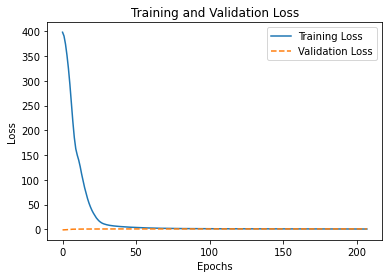

Training Loss: [0.85587947 0.30991507 2.65166555 1.30841475 2.29918715 0.4937178
 0.58832076 2.70520931 1.29542163 4.10189374 2.32977677 1.66823622
 1.2878862  5.80517674 1.19301781 1.71220398 2.17748701 4.69381522
 1.92184519 1.69081742 1.72299669 0.85998002 4.37057806 1.76889094
 1.5463389  2.28644445 1.87193001 1.65102637 2.50146852 1.73930157
 0.9980951  2.08193911 3.20133398 1.63813931 3.32073267 2.99767676
 2.32646348 3.18514901 1.4084323  1.25282172 1.39952993 3.20499296
 2.76509862 0.65659047 0.20147823 1.00776289 5.03094945 0.99948723
 1.95486297 3.39837667 1.02645937 0.972943   1.32737127 2.72540906
 1.19402386 1.63977534 0.14687292 0.913275   1.09099849 0.25673649
 1.73290515 1.69216926 3.65579773 0.89582448 4.02332809 1.24569591
 3.43247515 3.30595761 2.22907517 1.30158715 2.25549276 2.28019794
 0.49021071 2.32175714 2.67949431 0.3285538  2.23106253 1.49087109
 3.71598543 0.25020229 3.65424347 2.27033193 2.49809666 2.03865761
 2.37665252 2.29252405 0.9353764  1.21367751 0.7

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

# Assuming x_train and y_train are your training data

# Define custom loss function
def euclidean_distance_loss(y_true, y_pred):
    return np.sqrt(np.sum(np.square(y_pred - y_true), axis=-1))

# Define a custom scorer based on the custom loss function
def euclidean_distance_score(y_true, y_pred):
    return np.mean(euclidean_distance_loss(y_true, y_pred))

# Use make_scorer to create a scorer suitable for RandomizedSearchCV
scorer = make_scorer(euclidean_distance_score, greater_is_better=False)

# Create a multiple output regressor with MLPRegressor
# Set hidden_layer_sizes to specify the number of units in each hidden layer
# The last element in the tuple is the number of units in the final linear layer
base_regressor = MLPRegressor(hidden_layer_sizes=(50, 50, 3), alpha=0.001, learning_rate_init=0.001, max_iter=500, momentum=0.2, activation="tanh", early_stopping=True, random_state=42)

# Set up the parameter distribution for RandomizedSearchCV
param_dist = {
    'hidden_layer_sizes': [(30, 3), (50, 3), (20, 3)],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'momentum': [0.5, 0.9, 0.02],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(base_regressor, param_distributions=param_dist, scoring=scorer, cv=5, n_iter=50, verbose=0, random_state=42, validation_fraction=0.1)

# Fit the model
random_search.fit(x_train, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_regressor = random_search.best_estimator_

# Assuming x_train and y_train are your training data
best_regressor.fit(x_train, y_train)

# Evaluate the model on training set
y_train_pred = best_regressor.predict(x_train)
train_loss = euclidean_distance_loss(y_train, y_train_pred)

# Assuming x_val and y_val are your validation data
y_val_pred = best_regressor.predict(x_val)
val_loss = euclidean_distance_loss(y_val, y_val_pred)

# Plot training and validation loss over epochs
plt.plot(best_regressor.loss_curve_, label='Training Loss')
plt.plot(best_regressor.validation_scores_, label='Validation Loss', linestyle='--')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(f'Training Loss: {train_loss}')
print(f'Validation Loss: {val_loss}')

In [15]:
best_score

NameError: name 'best_score' is not defined

In [ ]:
best_params

{'momentum': 0.5,
 'learning_rate_init': 0.01,
 'hidden_layer_sizes': (30, 3),
 'alpha': 0.01,
 'activation': 'relu'}

In [ ]:
best_regressor

MLPRegressor(alpha=0.01, hidden_layer_sizes=(30, 3), learning_rate_init=0.01,
             max_iter=500, momentum=0.5)

NameError: name 'x_validation' is not defined